iter=[1], error=4.235
iter=[2], error=0.0
iter=[3], error=0.0
[[ 2.1]
 [-1.5]
 [ 0.5]]


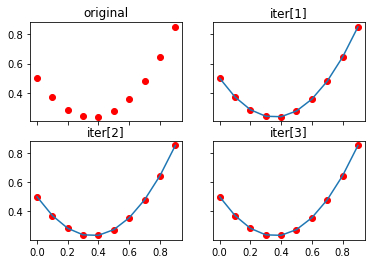

In [ ]:
# 가우스 뉴턴알고리즘 코드

import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt

def optimizer_gauss_newton(xdata,ydata,max_iter,epsilon=0.0):

    aidx = 0;
    f, axarr = plt.subplots(2,2)
    axarr[0,0].plot(xdata,ydata,'ro')
    axarr[0,0].set_title('original')

    #model 2th-polynomial: ax^2 + bx +c
    #pt = np.random.rand(3,1)
    pt = np.zeros((3,1))

    r_fun = lambda p:(ydata -(p[0,0]*xdata**2+p[1,0]*xdata+p[2,0]))
    Jrp = nd.Jacobian(r_fun)

    for i in range(1,max_iter):
        r = ydata -(pt[0,0]*xdata**2+pt[1,0]*xdata+pt[2,0])

        pt = pt - np.dot(np.linalg.pinv(Jrp(pt)),r)
        error = np.sum(np.absolute(r))
        if(i%1 == 0 or i == max_iter -1):
            print('iter=[{0}], error={1}'.format(i,round(error,4)))
            aidx +=1
            axarr[int(aidx/2),aidx%2].plot(xdata,ydata,'ro')
            axarr[int(aidx/2),aidx%2].plot(xdata,pt[0,0]*xdata**2+pt[1,0]*xdata+pt[2,0])
            axarr[int(aidx/2),aidx%2].set_title('iter[{0}]'.format(i))
    print(pt)
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
    plt.show()

if __name__ == '__main__':
    xdata = np.reshape(np.arange(0,1,0.1),(-1,1))
    ydata = 2.1*xdata**2 -1.5*xdata + 0.5
    optimizer_gauss_newton(xdata,ydata,4)